# Homogeneity of variance
Credits: http://www.cookbook-r.com/ (Creative Commons Attribution-Share Alike 3.0 Unported License)

## Problem
You want test samples to see for homogeneity of variance (homoscedasticity) – or more accurately. Many statistical tests assume that the populations are homoscedastic.

## Solution
There are many ways of testing data for homogeneity of variance. Three methods are shown here.

* **Bartlett’s test** - If the data is normally distributed, this is the best test to use. It is sensitive to data which is not non-normally distribution; it is more likely to return a “false positive” when the data is non-normal.
* **Levene’s test** - this is more robust to departures from normality than Bartlett’s test. It is in the car package.
* **Fligner-Killeen test** - this is a non-parametric test which is very robust against departures from normality.

For all these tests, the null hypothesis is that all populations variances are equal; the alternative hypothesis is that at least two of them differ.

### Sample data

The examples here will use the InsectSprays and ToothGrowth data sets. The `InsectSprays` data set has one independent variable, while the ToothGrowth data set has two independent variables.

In [1]:
head(InsectSprays)

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A


In [2]:
tg      <- ToothGrowth
tg$dose <- factor(tg$dose) # Treat this column as a factor, not numeric
head(tg)

,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10,VC,0.5


Quick boxplots of these data sets:

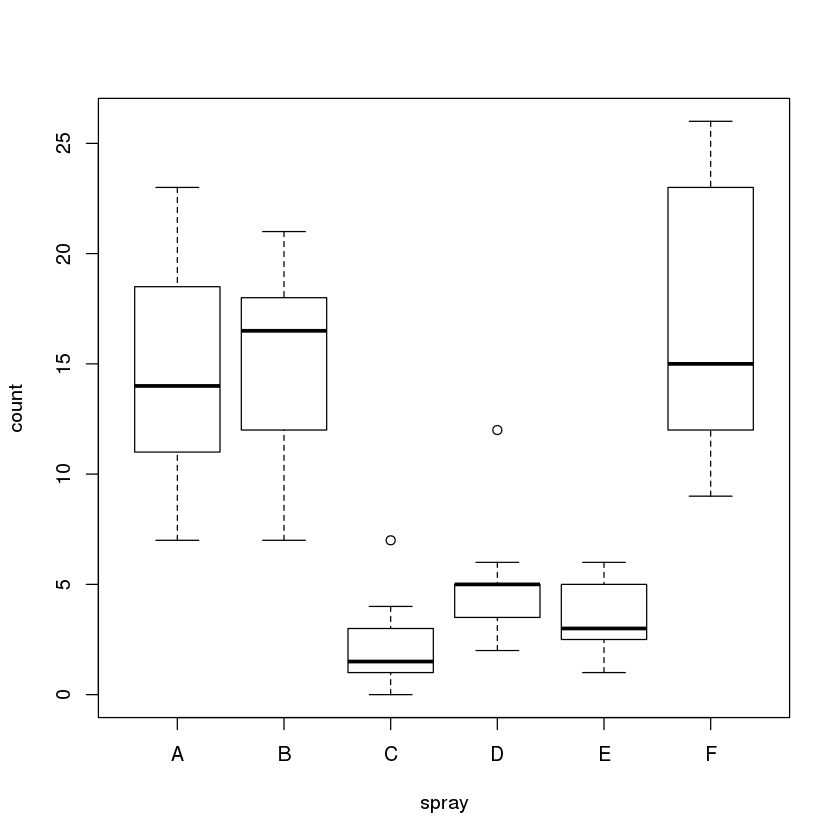

In [3]:
plot(count ~ spray, data = InsectSprays)

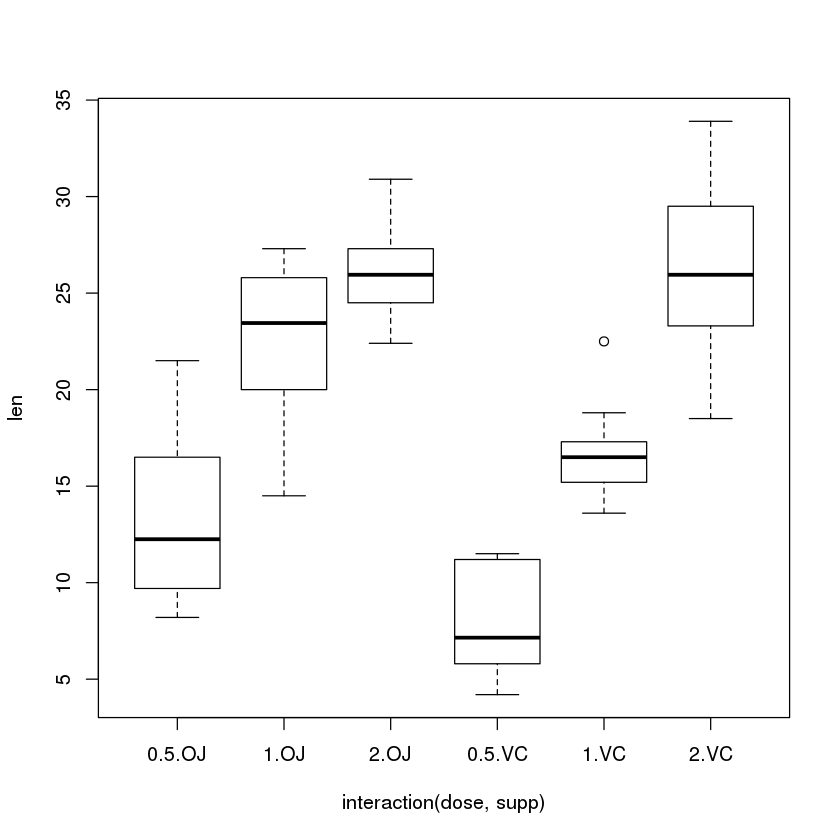

In [4]:
plot(len ~ interaction(dose,supp), data=ToothGrowth)

On a first glance, it appears that both data sets are heteroscedastic, but this needs to be properly tested, which we’ll do below.

### Bartlett’s test

With one independent variable:

In [5]:
bartlett.test(count ~ spray, data=InsectSprays)


	Bartlett test of homogeneity of variances

data:  count by spray
Bartlett's K-squared = 25.96, df = 5, p-value = 9.085e-05


In [6]:
# Same effect, but with two vectors, instead of two columns from a data frame
# bartlett.test(InsectSprays$count ~ InsectSprays$spray)

With multiple independent variables, the interaction() function must be used to collapse the IV’s into a single variable with all combinations of the factors. If it is not used, then the will be the wrong degrees of freedom, and the p-value will be wrong.

In [7]:
bartlett.test(len ~ interaction(supp,dose), data=ToothGrowth)


	Bartlett test of homogeneity of variances

data:  len by interaction(supp, dose)
Bartlett's K-squared = 6.9273, df = 5, p-value = 0.2261


In [8]:
# The above gives the same result as testing len vs. dose alone, without supp
bartlett.test(len ~ dose, data=ToothGrowth)


	Bartlett test of homogeneity of variances

data:  len by dose
Bartlett's K-squared = 0.66547, df = 2, p-value = 0.717


### Fligner-Killeen test

With one independent variable:

In [9]:
fligner.test(count ~ spray, data=InsectSprays)


	Fligner-Killeen test of homogeneity of variances

data:  count by spray
Fligner-Killeen:med chi-squared = 14.483, df = 5, p-value = 0.01282


In [10]:
# Same effect, but with two vectors, instead of two columns from a data frame
# fligner.test(InsectSprays$count ~ InsectSprays$spray)

The `fligner.test` function has the same quirks as `bartlett.test` when working with multiple IV’s. With multiple independent variables, the `interaction()` function must be used.

In [11]:
fligner.test(len ~ interaction(supp,dose), data=ToothGrowth)


	Fligner-Killeen test of homogeneity of variances

data:  len by interaction(supp, dose)
Fligner-Killeen:med chi-squared = 7.7488, df = 5, p-value = 0.1706


In [12]:
# The above gives the same result as testing len vs. dose alone, without supp
fligner.test(len ~ dose, data=ToothGrowth)


	Fligner-Killeen test of homogeneity of variances

data:  len by dose
Fligner-Killeen:med chi-squared = 1.3879, df = 2, p-value = 0.4996
